
# Affine Registration in 3D

This example explains how to compute an affine transformation to register two
3D volumes by maximization of their Mutual Information [Mattes03]_. The
optimization strategy is similar to that implemented in ANTS [Avants11]_.


In [1]:
import os.path as op
import numpy as np

import nibabel as nib
%matplotlib inline

In [8]:
from dipy.viz import regtools
from dipy.data import fetch_stanford_hardi, read_stanford_hardi, fetch_syn_data, read_syn_data
import tools

Let's fetch two b0 volumes, the static image will be the b0 from the Stanford
HARDI dataset


In [9]:
fetch_stanford_hardi()
nib_stanford, gtab_stanford = read_stanford_hardi()

Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/.dipy/stanford_hardi 


In [10]:
afqpath = '/Users/arokem/source/AFQ/'
MNI_T2 = nib.load(op.join(afqpath, 'templates/mni_icbm152_nlin_asym_09a_nifti/mni_icbm152_t2_tal_nlin_asym_09a.nii'))

MNI_T2_data = MNI_T2.get_data()
MNI_T2_affine = MNI_T2.get_affine()

In [11]:
fetch_syn_data()
nib_syn_t1, nib_syn_b0 = read_syn_data()
moving = np.array(nib_syn_b0.get_data())
moving_grid2world = nib_syn_b0.get_affine()

#static = MNI_T2_data
#static_grid2world = MNI_T2_affine

static = np.squeeze(nib_stanford.get_data())[..., 0]
static_grid2world = nib_stanford.get_affine()

Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/.dipy/syn_test 


In [13]:
reload(tools)

<module 'tools' from 'tools.pyc'>

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]
Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


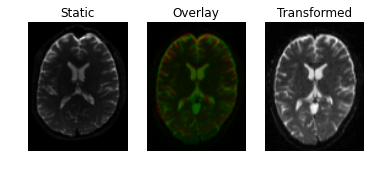

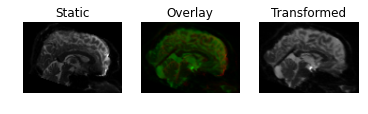

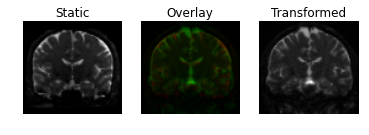

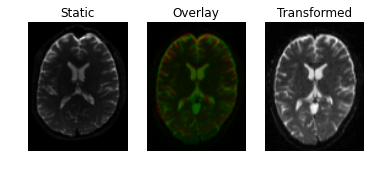

In [14]:
transformed, affine = tools.affine_registration(moving, static, moving_grid2world, static_grid2world)
regtools.overlay_slices(static, transformed, None, 0,
                        "Static", "Transformed", "transformed_affine_0.png")
regtools.overlay_slices(static, transformed, None, 1,
                        "Static", "Transformed", "transformed_affine_1.png")
regtools.overlay_slices(static, transformed, None, 2,
                        "Static", "Transformed", "transformed_affine_2.png")